In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 학습된 파일 가져오기
from keras.models import load_model
model = load_model('facial_key.h5')

In [4]:
import skimage.color
from skimage.filters import median

C:\Users\yunhyuck\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\yunhyuck\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(-0.5, 95.5, 95.5, -0.5)

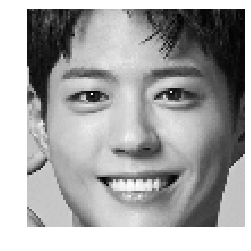

In [5]:
import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv2.imread('./data/park2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face = face_cascade.detectMultiScale(gray, 1.25 , 5)
for (x,y,w,h) in face:
    re_gray = gray[y:y+h, x:x+w]
    rescaled = skimage.transform.resize(re_gray, (96, 96))
plt.imshow(rescaled, 'gray')
plt.axis('off')

In [6]:
pix = np.resize(rescaled,(1,96,96,1))

In [7]:
# 모델 예측
pred = model.predict(pix)

In [8]:
# 예측된 값 확인
pred

array([[65.717155, 37.2512  , 29.841156, 37.59597 , 58.62532 , 36.566093,
        72.995964, 35.60783 , 36.79851 , 38.532246, 21.880949, 39.101284,
        53.97366 , 29.443073, 79.56507 , 28.419487, 38.597576, 31.440254,
        14.981076, 33.469357, 47.90662 , 61.449574, 68.14172 , 72.86328 ,
        33.286476, 76.07507 , 49.648598, 73.96333 , 48.108368, 78.3274  ]],
      dtype=float32)

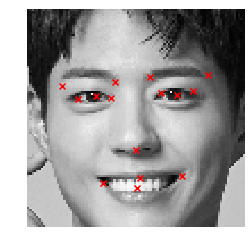

In [9]:
# 출력
plt.imshow(rescaled, 'gray')
plt.axis('off')
pt = np.vstack(np.split(pred[0],15)).T
plt.scatter(pt[0],pt[1],c='red',marker = 'x')

In [13]:
# 수염사진 업로드 
moustache = plt.imread('./data/mustache.png')
moustache = skimage.color.rgb2gray(moustache)

In [14]:
moustache = median(moustache) # 수염의 중간 값 계산

C:\Users\yunhyuck\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [15]:
moustache

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

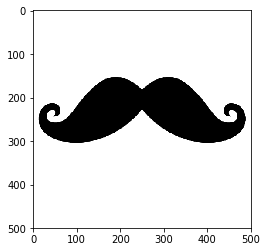

In [16]:
plt.imshow(moustache, 'gray') # 수염 사진 출력

In [17]:
from skimage import measure
moustache_contour = measure.find_contours(moustache, 0.5)[0] #  윤곽선 추출
moustache_contour

array([[303.        , 407.25      ],
       [302.25      , 408.        ],
       [302.125     , 409.        ],
       ...,
       [303.0027933 , 406.        ],
       [303.00235849, 407.        ],
       [303.        , 407.25      ]])

In [18]:
# 주어진 위치에 윤곽선을 그려주는 함수
def scaled_moustache(ax, center_point, draw):
    X = moustache_contour.copy()
    X = (X - X.min(axis=0)) / X.max(axis=0)[1]
    X_scaled = X.max(axis=0) - X.min(axis=0)
    X -= np.array([X_scaled[0]/2, X_scaled[1]/2])
    X *= draw
    X += center_point[::-1]
    ax.fill(X[:, 1], X[:, 0],"black")

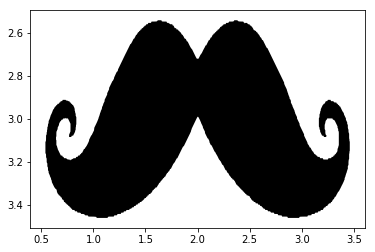

In [19]:
ax = plt.gca()
scaled_moustache(ax, np.array([2, 3]), 3)
ax.invert_yaxis()

In [20]:
# 예측된 지점의 함수와 통합 (입 위치)
def drawing(points, ax):
    draw = 2 * np.linalg.norm(predictions[12] - predictions[11])
    center_point = predictions[13]
    scaled_moustache(ax, center_point, draw)

In [21]:
# 예측된 값에 대해 배열 재정의
predictions = pred.reshape(15, 2)

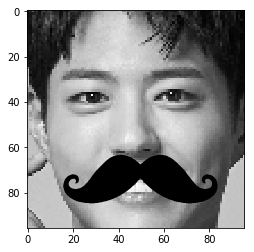

In [22]:
fig, ax = plt.subplots()
ax.imshow(rescaled, 'gray')
drawing(predictions, ax)